# 1 . Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# 2. Loading and Reading the Netflix Data File:

In [3]:
df = pd.read_csv("C:\\Users\\lordo\\unified mentor\\netflix.csv")

In [5]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# 3. No of rows and columns in the Dataframe:

In [11]:
rows , cols = df.shape
print("Rows:",rows)
print("Columns:",cols)

Rows: 8790
Columns: 10


### columns overview

| Column Name    | Description                                        |
| -------------- | -------------------------------------------------- |
| `show_id`      | Unique identifier for each show                    |
| `type`         | Whether the content is a Movie or a TV Show        |
| `title`        | Name/title of the show                             |
| `director`     | Name of the show's director                        |
| `country`      | Country where the show was produced                |
| `date_added`   | Date when the show was added to Netflix            |
| `release_year` | Year when the show was originally released         |
| `rating`       | Netflix content rating (e.g., TV-MA, PG-13)        |
| `duration`     | Length of the show (minutes for movies or seasons) |
| `listed in`    | Genres or categories the show belongs to           |


# 4. Data Cleaning:

In [18]:
# 1. Checking Null values:

df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

-- The dataset has no null values:

# 5 .Checking Datatypes:

In [18]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

# Changing datatype of columns:

## 1. Converting date_added  from object to date_time:

In [23]:
df['date_added'] = pd.to_datetime(df['date_added'])

## 2. Converting the type and rating column from object to category:

In [26]:
cat_cols = ['type','listed_in']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [28]:
df.dtypes

show_id                 object
type                  category
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in             category
dtype: object

# Data Type got changed:

# 6 . Drop duplicates rows:

In [33]:
df.drop_duplicates()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [35]:
df.shape

(8790, 10)

# There are no duplicate rows in DataFrame:

# 6 . Understanding Data:

In [40]:
# 1. info() (Quick Summary of Data Frame:)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   category      
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   category      
dtypes: category(2), datetime64[ns](1), int64(1), object(6)
memory usage: 595.5+ KB


# 2. describe() (Statistics Summary)

In [44]:
df.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


# EDA (EXPLORATORY DATA ANALYSIS)

## 1 Distribution of Categorical Features (Columns):

In [49]:
# 1. type :

df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [51]:
# 2. country:

df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [53]:
# 3. rating:

df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

# 1.Distribution of netflix content over the years:


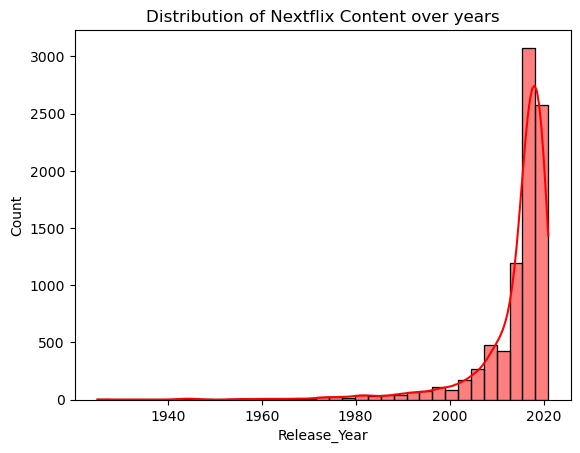

In [330]:
#  Histogram for numerical feature: (Release_Year)

sns.histplot(df['release_year'],bins=35 , kde = True , color = 'red')

plt.title("Distribution of Nextflix Content over years")

plt.xlabel("Release_Year")

plt.ylabel("Count")

plt.show()

-- Insight:

-- 1.There is increase in the number of films released after the year 1990 because film industry  was booming at the period of time

--   2.But there is sudden decrease in the number of released after 2019 due to pandemic corona:

# 2. Distribution of Rating:


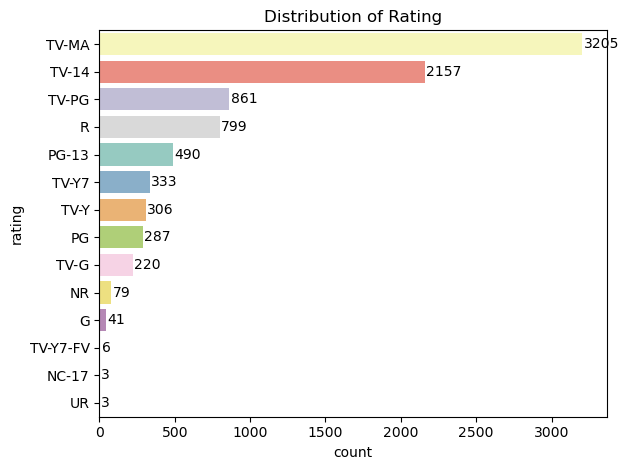

In [63]:
# Creating Plot:
ax = sns.countplot(data=df,  y='rating',  order=df['rating'].value_counts().index,  hue='rating',  dodge=False,  palette='Set3')

plt.title('Distribution of Rating')

# Add Labels:
for p in ax.patches:
    width = p.get_width()
    plt.text(width+10,  p.get_y() + p.get_height() / 2, int(width),  va='center')

plt.tight_layout()  

plt.show()

 --  Insight:

  The ratings are organized from highest to lowest count:
  
 1. TV-MA: Most common, with the highest count.
  
 2. TV-14: Second most frequent.
  
 3. TV-PG: Third highest.

# 3. Distribution of Types:


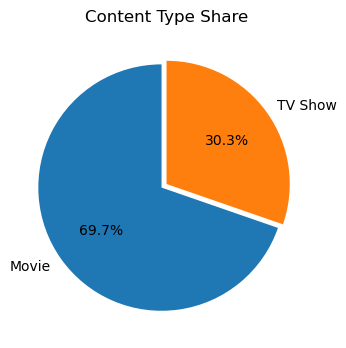

In [70]:
# Pie chart:

df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.05, 0], figsize=(4, 4))

plt.title('Content Type Share')

plt.ylabel('')

plt.show()


--  Insight:

-- Maximum number of people(69.7%) like watching Movies in Comparsion to TV show(30.3):

--  Reason:

-- 1. People prefer movies over TV shows because movies are shorter, offering a complete story in one sitting. 

-- 2. They often have higher production quality and feel like special events. 

-- 3. Movies are easier to watch without long commitments, while TV shows require following many episodes.



In [74]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# 4.Top 10 Countries with highest number of netflix titles:

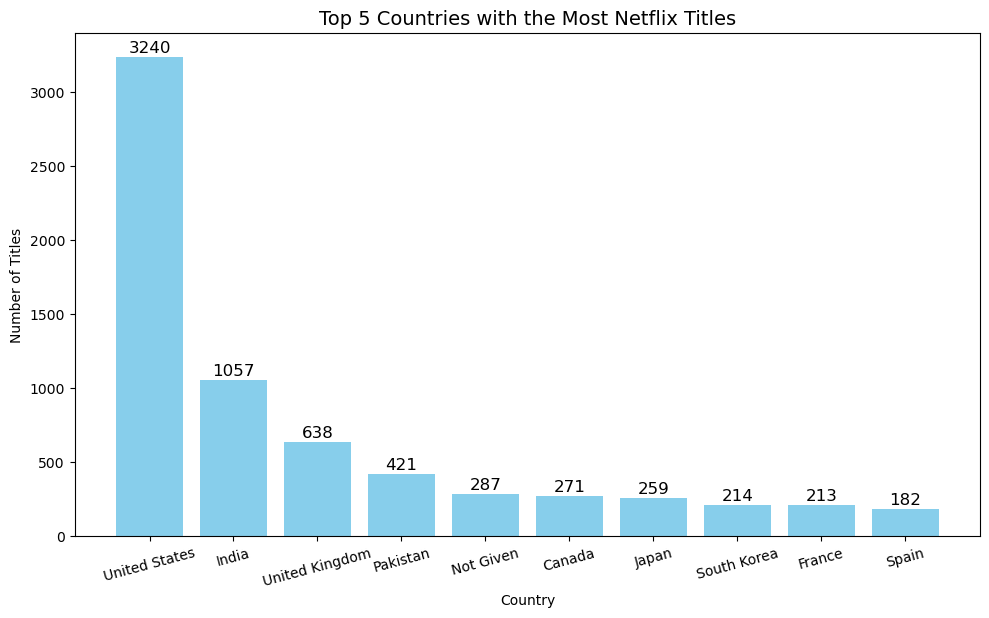

In [77]:
# 1.Selecting top 10 countries:

top_countries = df['country'].value_counts().head(10)

# 2 Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top_countries.index, top_countries.values, color='skyblue')

# 3.Add labels 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 10, int(yval), ha='center', va='bottom', fontsize=12)


plt.title('Top 5 Countries with the Most Netflix Titles', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.xticks(rotation=15)
plt.show()

### Insight:

 1.The United States has the highest number of titles at 3,240, significantly more than the other countries.

 2.India follows with 1,057 titles, then the United Kingdom with 638, Pakistan with 421, and countries like Canada, Japan, South Korea, France, and Spain.

 3.The chart visually emphasizes the large disparity between the United States and the other countries in terms of the number of Netflix titles available.

### Reason

 Why do the United States has the highest number of Netflix Titles:

 The United States has the highest number of Netflix titles because Netflix is based there, the U.S. has the world’s largest film and TV industry, 

 a large English-speaking audience, and high content demand. Many Netflix Originals are also produced in the U.S., boosting its content count.

# 5 Analyze the growth of Movies and TV Shows over the years. 

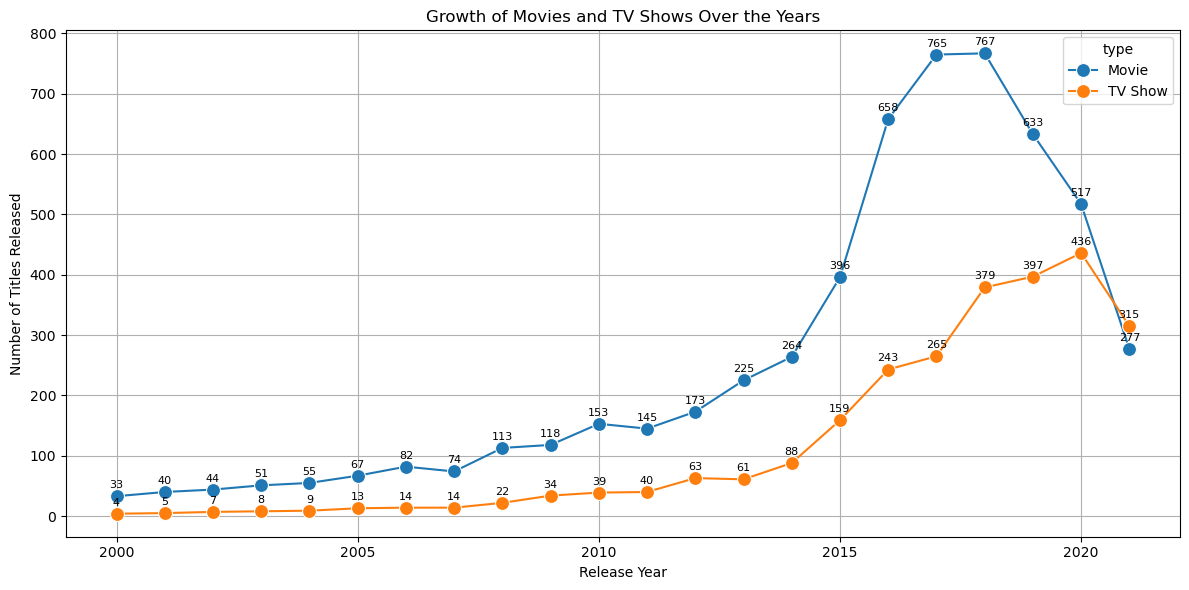

In [82]:
yearly_counts = df.groupby(['release_year','type'], observed=True).size().reset_index(name='count')


# Including the data after 2000 for clear and better understanding:
yearly_counts = yearly_counts[yearly_counts['release_year'] >= 2000]


plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_counts, x='release_year', y='count', hue='type', marker='o', markersize=10, palette='tab10')


for _, row in yearly_counts.iterrows():
    plt.text(row['release_year'], row['count'] + 10,  # slight offset above point
             str(row['count']),
             ha='center', va='bottom', fontsize=8)


plt.title('Growth of Movies and TV Shows Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.tight_layout()
plt.show()


 ### 1.Insights:


#### Movies (Blue Line):
 
 Gradual increase until around 2015, peaking around 2017.
 
 After that, the growth slows down but remains relatively high.
    
#### 2 TV Shows (Orange Line):
 Starts at a lower count compared to movies.
 
 Shows significant growth around 2015, with a peak in 2020.


 AFTER 2000 THERE IS RISE IN THE NUMBER OF RELEASED MOVIES AND TV SHOWS
 
 BUT NUMBER OF MOVIES RELASED ARE MORE THAN TV SHOWS OVER THE YEARS:


#### Key point:
 Between 2018 to 2020 there is sudden drop in the number of netflix movies.
 
 Between 2018 to 2020 there is gradually increase in the number of netflix tv shows:



###  Why Are TV Shows Increasing on Netflix After 2018?

#### 1. Viewer Engagement

 1.TV shows promote binge-watching and viewer retention

 2.Multiple episodes keep users hooked longer than single movies

 3.Stronger emotional attachment to characters and story arcs


#### 2.Content Strategy Shift

 1.Focus on producing exclusive original series

 2.Successful shows can continue for multiple seasons

 3.Originals build global brand identity (e.g., Stranger Things)


#### 3.Licensing Dynamics

1 Competing platforms (Disney+, HBO Max) reclaiming movie rights

2 Netflix’s licensed movie library has decreased

3 Increased investment in in-house series to maintain content volume



# 6. Distribution of listed_in gnere distribution between movies and Tv shows:

In [93]:
# STEP 1: SPLITTING THE GENRE :

df['genres'] = df['listed_in'].str.split(',')

# Step 2: EXPLODE THE GENRE SO EACH GNERE GET ITS OWN ROWS:

df_exploded = df.explode('genres')
df_exploded['genres'] = df_exploded['genres'].str.strip()

# STEP 3: COUNTING TOTAL GENRE:

genre_counts = df_exploded['genres'].value_counts().head(10)
genre_counts


genres
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

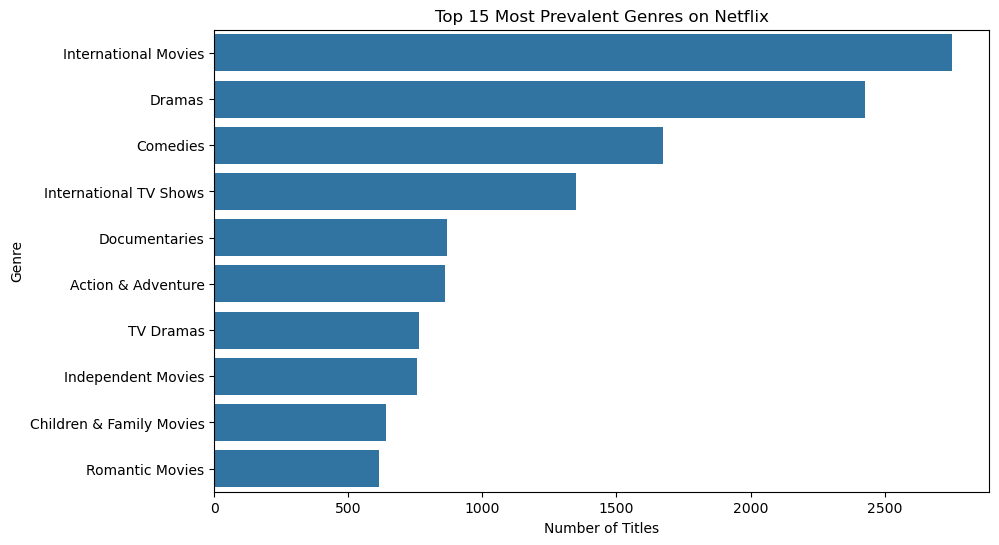

In [95]:
# plotting:

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,)
plt.title('Top 15 Most Prevalent Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [97]:
# after exploding:

df_exploded.shape

(19294, 11)

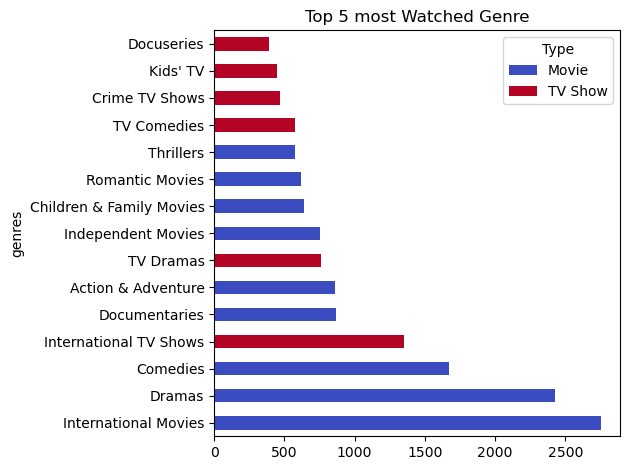

In [101]:
# step 1 . Group by both types and genres:

genre_type = df_exploded.groupby(['type','genres'],observed=False).size().reset_index(name='count')

# step 2. pivot for side by side comparison:

genre_type_pivot = genre_type.pivot(index='genres', columns='type', values='count')

# Step 3: sort by total count:

genre_type_pivot['Total'] = genre_type_pivot.sum(axis=1)
genre_type_sorted = genre_type_pivot.sort_values('Total' , ascending = False).head(15)

# Step 4: plotting:

genre_type_sorted.drop(columns='Total').plot(kind='barh', stacked=True,  colormap='coolwarm')
plt.title("Top 15 most Watched Genre")
plt.legend(title='Type')
plt.tight_layout()
plt.show()


-- Top 3 most Watched Genre:

### INSIGHT:

#### 1. For movies:

 1.International movies is the most watched Genre among all in Type movie followed by Dramas and Comedies.

#### 2.For Tv Shows:

 2.International Tv Shows is the most watched Genre among all in Type Tv shows followed by Tv Dramas and Tv Comedies:

#  8. Distribution of duration for both Movies and TV Shows. 


### For Movies

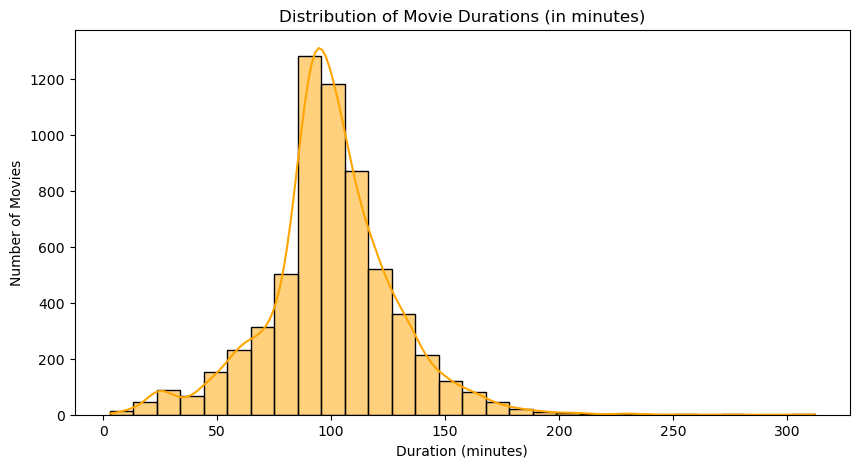

In [134]:
# 1. Filtering the dataframe df to keep only rows where type is 'movie'

movies = df[df['type'] == 'Movie'].copy()

# 2. str.extract(r'(\d+)') regular expression extracting the numeric part(\d+ one or more digit)
# and converting it numeric flaot

movies['duration'] = movies['duration'].str.extract(r'(\d+)').astype(float)

# 3. plotting:

plt.figure(figsize=(10,5))
sns.histplot(movies['duration'], bins=30, kde=True, color='orange')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


### Count the number of movies whose duration is between 90 to 100 min:

In [136]:
count = movies[(movies['duration']>=90) & (movies['duration']<=100)].shape[0]
print("no of movies:", count)

print()

no of movies: 1476



### Insights:

1.there are more than 1476 movies whose duration is between 90 to 100 min.

 2.there are 3 movies with the shortest duration 1 minute:

 3.there is only 1 movie with the highest duration 312 minutes:


### Movie with the highest duration

In [142]:
max_duration = movies['duration'].max()
highest_duration_movie = movies[movies['duration'] == max_duration][['title', 'duration']]

print("Movie with the highest duration")
print(highest_duration_movie)


Movie with the highest duration
                           title  duration
7822  Black Mirror: Bandersnatch     312.0


 -- Movie with the highest duration is  Black Mirror: Bandersnatch whose duation is 312 minutes.

### For TV Shows:

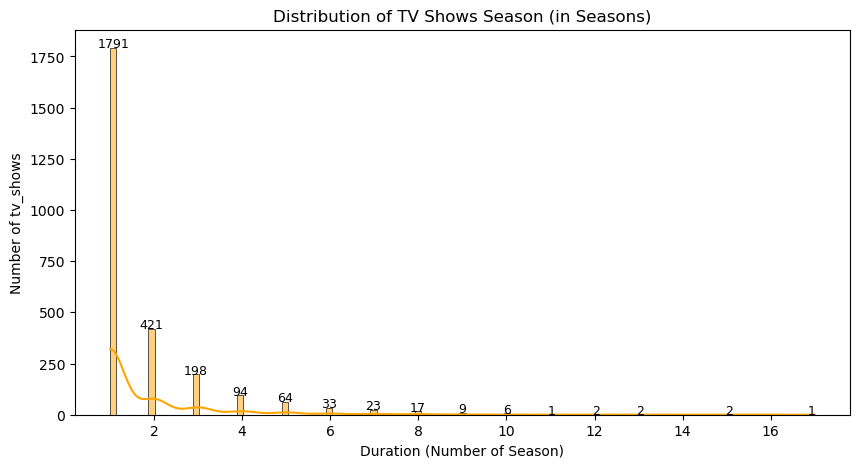

In [118]:
# 1. Filtering the dataframe df to keep only rows where type is 'tv_shows'

tv_shows = df[df['type'] == 'TV Show'].copy()

# 2. str.extract(r'(\d+)') regular expression extracting the numeric part(\d+ one or more digit)
# and converting it numeric flaot

tv_shows['duration'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

# 3. plotting:

plt.figure(figsize=(10,5))
ax = sns.histplot(tv_shows['duration'], kde=True, color='orange')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", fontsize=9)

plt.title('Distribution of TV Shows Season (in Seasons)')
plt.xlabel('Duration (Number of Season)')
plt.ylabel('Number of tv_shows')
plt.show()


### Tv shows with the maxmimum number of Seasons:

In [121]:
max_seasons = tv_shows['duration'].max()
most_seasons_shows = tv_shows[tv_shows['duration'] == max_seasons][['title', 'duration']]

print("TV Show(s) with the highest number of seasons:")
print(most_seasons_shows)


TV Show(s) with the highest number of seasons:
               title  duration
6697  Grey's Anatomy      17.0


### Insights:

 1.There are highest(1793 tv shows) with 1 season:

 2.There is only 1 Tv show( Grey's Anatomy)  with 17 season:

# 9 Distribution of content across different category:

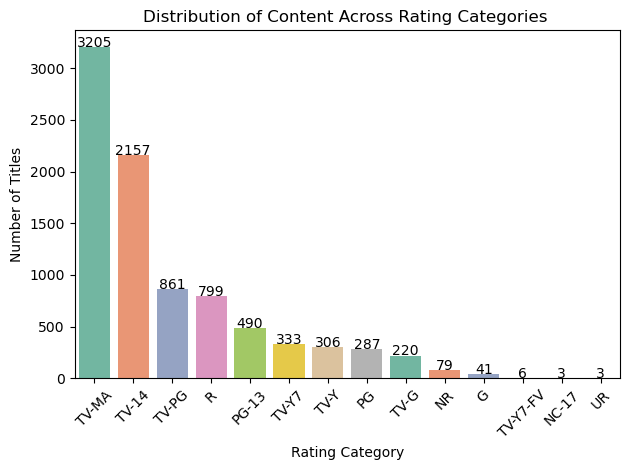

In [155]:
# step 1 : Counting each rating category:

rating_counts = df['rating'].value_counts()

# step 3. plotting:

ax = sns.barplot( x = rating_counts.index, y = rating_counts.values , palette = 'Set2' , order = rating_counts.index, hue = rating_counts.index)


# step 4 :Adding labels:

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), 
                ha="center", fontsize=10) 


plt.title('Distribution of Content Across Rating Categories ')
plt.xlabel('Rating Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight:

 1.The category with the highest number of titles is "TV-MA" with 3,205 titles.

 2.Other notable categories include "TV-14" (2,157 titles) and "R" (861 titles).

# 10 . Distribution of Netflix content over different month or Quarters:

### 1.Netflix content over different Month

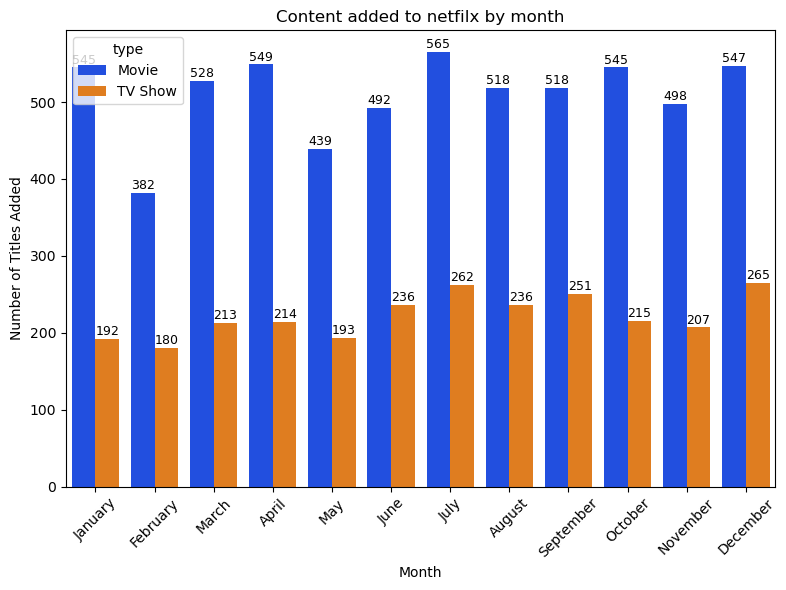

In [168]:
# Step 1:extracting month:

df['month_added'] = df['date_added'].dt.month_name()

# step 2: ploting content added by month:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# step 3: plotting :

plt.figure(figsize=(8,6))
ax= sns.countplot(data = df , x='month_added' , order = month_order,palette='bright',hue='type')

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center',va='bottom',fontsize=9)
        
plt.title("Content added to netfilx by month")
plt.xlabel('Month')
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight:

1. The highest amount of content added to netflix (movies) is in july month with total movies 565 followed by April and december (and lowest in

 February with 382 movies)

2. The highest amount of contnet added to netflix (tv shows) is in December Month with total tv shows 265 followed by july and september month

   and lowest in February Month



# 2. For Quarters:

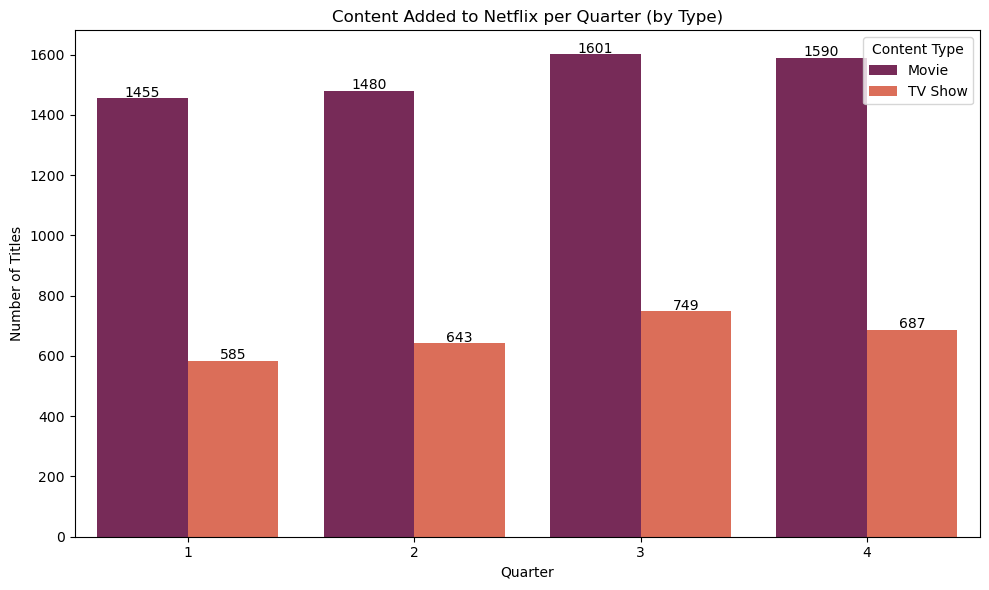

In [186]:
# Step 1: Extract Quarter

df['quarter_added'] = df['date_added'].dt.quarter

# Step 2: Plotting

plt.figure(figsize=(10,6))
ax = sns.countplot(x='quarter_added', hue='type', data=df, palette='rocket')

# Step 3 Add labels

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha="center", fontsize=10)

plt.title('Content Added to Netflix per Quarter (by Type)')
plt.xlabel('Quarter')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


### insight : 

 1 .Highest number of content was released in 3rd quarter:

  1. Movies = 1601 titles

  2. Tv Shows = 749

 
 2.lowest content was relaesed in 1st quarter:

  1 .Movies = 1455 titles

  2 .Tv Shows = 585

# 3. Content over days of week:

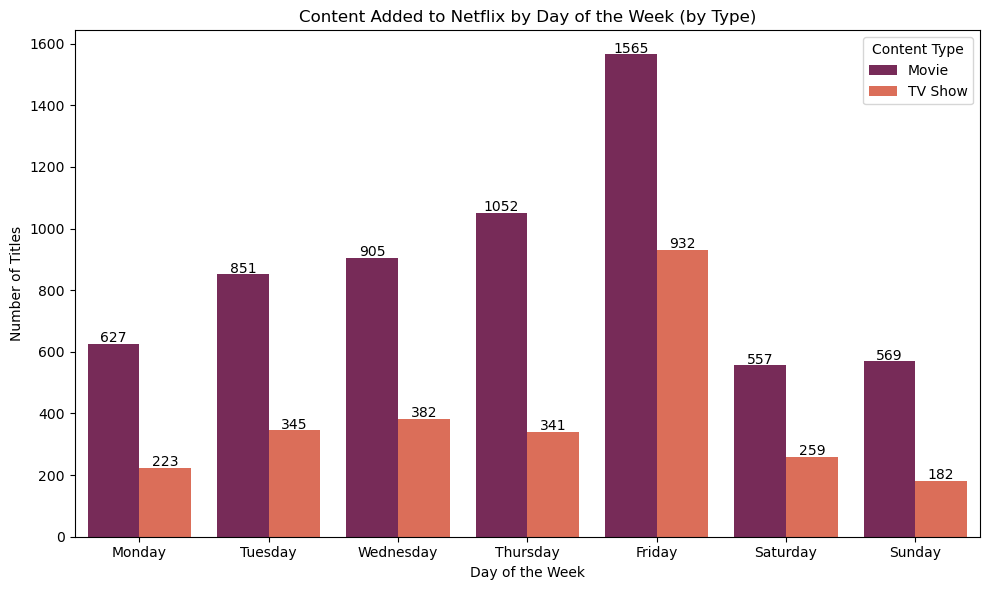

In [189]:
# Step 1: Extract Day of Week

df['day_of_week'] = df['date_added'].dt.day_name()

# Order days of the week.

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 2: Plotting
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='day_of_week', hue='type', data=df, order=ordered_days, palette='rocket')

# Step 3: Add labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5, int(height), ha="center", fontsize=10)

plt.title('Content Added to Netflix by Day of the Week (by Type)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


### Insight:

1. The highest number of content added to netflix is on friday ( for both movies(1565) and tv show(932))

2. The lowest number  of content added to netlix for ( movie on saturday(557) and (for tv show on sunday(182).

# 13.  Most frequent directors on the  Netflix platform 

In [224]:
top_directors = df['director'].value_counts().head(10)
top_directors

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

### 1  Director who directed the highest number of movies:

In [251]:
# Step 1: Filter for Movies only
movies_df = df[df['type'] == 'Movie']

# Step 2: Count director frequency
movie_directors = movies_df['director'].value_counts()

# Step 3: Most frequent movie director
most_frequent_movie_director = movie_directors.index[1]
most_frequent_movie_count = movie_directors.iloc[1]

print("Most frequent director for Movies:")
print(f"{most_frequent_movie_director} ({most_frequent_movie_count} Movies)")


Most frequent director for Movies:
Rajiv Chilaka (19 Movies)


### 2.Director Who directed the highest number of TV shows

In [255]:
# Step 1: Filter for TV Shows only
tv_df = df[df['type'] == 'TV Show']

# Step 2: Count director frequency
tv_directors = tv_df['director'].value_counts()

# Step 3: The most frequent director
most_director = tv_directors.index[1]
most_count = tv_directors.iloc[1]

print("Most frequent director for TV Shows:")
print(f"{most_director} ({most_count} TV Shows)")


Most frequent director for TV Shows:
Alastair Fothergill (14 TV Shows)


# 14.Extract the year from date_added columns

In [260]:
# Extracting Year from Date_Added Column

df['date_added_year'] = pd.to_datetime(df['date_added']).dt.year

In [190]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,month_added,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",September,2021


### 14.1 Create A Difference_Year Column:

Difference_Year tell how much time does the title took to relase on netflix before it was released in theatre:

In [263]:
df['Difference_Year'] =  df['date_added_year'] - df['release_year']

### 14.2  Neflix Title which took the longest year to stream on Netflix before its relase date:

In [272]:
# Step 1: Finding the Maximum_Year Value:
max_diff = df['Difference_Year'].max()

# Step 2: Getting the row
result = df[df['Difference_Year'] == max_diff]

result


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,month_added,date_added_year,Difference_Year,added_same_year
421,s4251,TV Show,Pioneers: First Women Filmmakers*,Not Given,Pakistan,2018-12-30,1925,TV-14,1 Season,TV Shows,[TV Shows],December,2018,93,False


### Insight:

The Tv Shows Pioneers: First Women Filmmakers which originates from pakistan took the longest time (93 Year) to Stream ON Netflix:

### 14.3 Find out the netflix titles which was streamed first on Netflix and then in Theatre:

In [279]:
# Step 1: Find out the  rows where Difference_Year is less than 0
min_diff = df[df['Difference_Year'] < 0]

# Step 2: Displaying the titles
result = min_diff[['title', 'type', 'release_year','date_added_year','Difference_Year']]

result


,title,type,release_year,date_added_year,Difference_Year
3869,Hans Teeuwen: Real Rancour,Movie,2018,2017,-1
5138,Incoming,Movie,2019,2018,-1
5178,Jack Taylor,TV Show,2016,2013,-3
6948,Hilda,TV Show,2021,2020,-1
6992,Polly Pocket,TV Show,2021,2020,-1
7355,Love Is Blind,TV Show,2021,2020,-1
7436,Fuller House,TV Show,2020,2019,-1
7484,Maradona in Mexico,TV Show,2020,2019,-1
7517,BoJack Horseman,TV Show,2020,2019,-1
7537,The Hook Up Plan,TV Show,2020,2019,-1


### Insight:

 1.Jake Taylor a Tv Show which was first stream on Netflix took 3 years to release in Theatre:

2.Snnse 8 a Tv Show which was first stream on Netflix took 2 years to release in Theatre:


### 14.4 Find out the netflix titles whose release_year and date_added_year is same:

In [286]:
df['added_same_year'] = df['release_year'] == df['date_added_year']
df['added_same_year'].value_counts()


added_same_year
False    5551
True     3239
Name: count, dtype: int64

### Insight:

-- There are total 3239 titles whose release year and streamed year on netflix is same

# 15. Directors who has worked in the most genre:

In [328]:
# Step 1: Create a pivot table showing the number of titles per director per genre
pivot = df.pivot_table(index='director', 
                       columns='listed_in', 
                       values='title', 
                       aggfunc='count', 
                       fill_value=0,
                      observed = False)

# Step 2: Convert counts to boolean (True if genre present)
genre_presence = pivot > 0

# Step 3: Count how many genres each director has worked in
genre_counts = genre_presence.sum(axis=1)

# Step 4: Sort and get top 10 directors
top_10_diverse_directors = genre_counts.sort_values(ascending=False).head(10)

top_10_diverse_directors


director
Not Given            271
Martin Scorsese        9
Don Michael Paul       7
Steven Spielberg       7
Justin G. Dyck         6
Clint Eastwood         6
Yılmaz Erdoğan         6
Quentin Tarantino      6
David Dhawan           5
John G. Avildsen       5
dtype: int64

### Insight:

-- Martin Scorsese is the director who has worked in the highest number of Genre:

# 16 Top 10 country with the most diverse genre on Netflix

In [246]:
# Step 1: Group by country
grouped = df.groupby('country')['listed_in']

# Step 2: For each country, join all genres, split them into a list, and convert to a set to keep unique genres
unique_genres_per_country = grouped.apply(
    lambda x: set(', '.join(x.dropna()).split(', '))
)

# Step 3: Count the number of unique genres for each country
genre_counts = unique_genres_per_country.apply(len)

# Step 4: Sort and get top 10 countries with the most genre diversity
top_10_countries = genre_counts.sort_values(ascending=False).head(10)

print(top_10_countries)


country
United States     42
Not Given         36
India             35
Pakistan          35
Australia         35
United Kingdom    35
Canada            35
France            31
Japan             31
Mexico            30
Name: listed_in, dtype: int64


###  Insight:

1 . United State has the highest number of genre on Netflix:

2. India , Pakistan , Australia , United Kingdom and Canada has the 2nd highest number of  genre on netflix.

3. France and Japan has the 3rd highest number of genre on Netflix


# 17 .Fastest growing genre between 2016 to 2020 ( recent years).

In [318]:
# Filter data for 2016 to 2020
df_recent = df[df['year'].between(2016, 2020)].copy() 

# create 'genre' column
df_recent.loc[:, 'genre'] = df_recent['listed_in'].str.split(', ')

# Explode genres
df_exploded = df_recent.explode('genre')

# Count genres per year
genre_counts = df_exploded.groupby(['genre', 'year']).size().unstack(fill_value=0)

# Calculate growth %
genre_counts['growth_%'] = ((genre_counts[2020] - genre_counts[2016]) / genre_counts[2016].replace(0, 1)) * 100

# Top 10 growing genres
top_growth = genre_counts.sort_values('growth_%', ascending=False)
print(top_growth['growth_%'].head(10))


genre
Romantic Movies         2371.428571
Reality TV              1500.000000
Classic Movies          1350.000000
LGBTQ Movies            1300.000000
Cult Movies             1200.000000
Faith & Spirituality    1000.000000
Horror Movies            862.500000
Thrillers                850.000000
Action & Adventure       844.444444
Comedies                 766.666667
Name: growth_%, dtype: float64


### Insight

-- The fastest growing genre in the recent year between 2016 to 2020 is Romantic Movies followed by RealityTV and Reality Movies 